1. Load the data
2. Convert RGB to vector?
3. Run Dimensionality reductions

In [2]:
!ls data
!ls data/MITinsidecity/
!ls data/MITmountain/

CALsuburb       MIThighway      MITopencountry  PARoffice       livingroom
MITcoast        MITinsidecity   MITstreet       bedroom
MITforest       MITmountain     MITtallbuilding kitchen
image_0001.jpg image_0063.jpg image_0125.jpg image_0187.jpg image_0249.jpg
image_0002.jpg image_0064.jpg image_0126.jpg image_0188.jpg image_0250.jpg
image_0003.jpg image_0065.jpg image_0127.jpg image_0189.jpg image_0251.jpg
image_0004.jpg image_0066.jpg image_0128.jpg image_0190.jpg image_0252.jpg
image_0005.jpg image_0067.jpg image_0129.jpg image_0191.jpg image_0253.jpg
image_0006.jpg image_0068.jpg image_0130.jpg image_0192.jpg image_0254.jpg
image_0007.jpg image_0069.jpg image_0131.jpg image_0193.jpg image_0255.jpg
image_0008.jpg image_0070.jpg image_0132.jpg image_0194.jpg image_0256.jpg
image_0009.jpg image_0071.jpg image_0133.jpg image_0195.jpg image_0257.jpg
image_0010.jpg image_0072.jpg image_0134.jpg image_0196.jpg image_0258.jpg
image_0011.jpg image_0073.jpg image_0135.jpg image_0197.jpg ima

In [16]:
from skimage import io
import os

folders = ['CALsuburb', 'MIThighway', 'MITopencountry', 'PARoffice', 'livingroom', \
            'MITcoast', 'MITinsidecity', 'MITstreet', 'bedroom', \
            'MITforest', 'MITmountain', 'MITtallbuilding', 'kitchen']
images = []
max_images = 411

filenames = ['image_' + str(i+1).zfill(4) + '.jpg' for i in range(max_images)]

for folder in folders:
    for filename in filenames:
        new_filename = "data/" + folder + '/' + filename
        if os.path.isfile(new_filename):
            images.append([io.imread(new_filename), folders.index(folder)])
print set([folders[image[1]] for image in images])

set(['MITcoast', 'MITmountain', 'livingroom', 'MITopencountry', 'PARoffice', 'MITtallbuilding', 'CALsuburb', 'bedroom', 'MITforest', 'MIThighway', 'MITstreet', 'MITinsidecity', 'kitchen'])


Mean length  246
Mean width  270


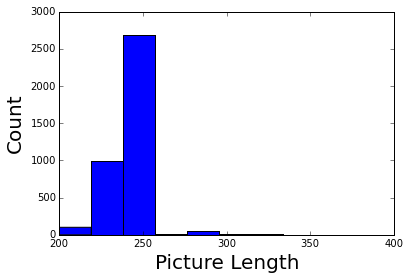

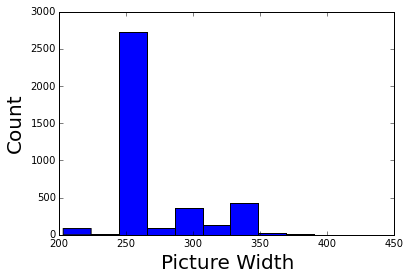

In [17]:
#Sizes seem to be generally similar...
lengths = [images[i][0].shape[0] for i in range(len(images))]
widths = [images[i][0].shape[1] for i in range(len(images))]

L = int(sum(lengths) * 1.0 / len(lengths))
W = int(sum(widths) * 1.0 /len(widths))

print "Mean length ", L
print "Mean width ", W

%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel("Picture Length", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.show()

plt.hist(widths)
plt.xlabel("Picture Width", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.show()

Darn, it looks like the picture widths and lengths vary quite a bit. Hopefully scaling won't change by too much

# The following code resizes the data and writes to resized_data

In [18]:
# Scaling
from skimage import transform

for image in images:
    image[0] = transform.resize(image[0], (L, W))

In [19]:
# write all the images out
directory = "resized_data"
!mkdir $directory
counts = [0] * len(folders)
for image in images:
    class_index = image[1]
    image_class = folders[class_index]
    
    counts[class_index] += 1
    class_number = counts[class_index]
    
    filename = directory + "/" + image_class + "_" + str(class_number)
    np.save(filename, image[0])
    
!ls $directory

rm: resized_data: No such file or directory
CALsuburb_1.npy         MITinsidecity_188.npy   MITtallbuilding_10.npy
CALsuburb_10.npy        MITinsidecity_189.npy   MITtallbuilding_100.npy
CALsuburb_100.npy       MITinsidecity_19.npy    MITtallbuilding_101.npy
CALsuburb_101.npy       MITinsidecity_190.npy   MITtallbuilding_102.npy
CALsuburb_102.npy       MITinsidecity_191.npy   MITtallbuilding_103.npy
CALsuburb_103.npy       MITinsidecity_192.npy   MITtallbuilding_104.npy
CALsuburb_104.npy       MITinsidecity_193.npy   MITtallbuilding_105.npy
CALsuburb_105.npy       MITinsidecity_194.npy   MITtallbuilding_106.npy
CALsuburb_106.npy       MITinsidecity_195.npy   MITtallbuilding_107.npy
CALsuburb_107.npy       MITinsidecity_196.npy   MITtallbuilding_108.npy
CALsuburb_108.npy       MITinsidecity_197.npy   MITtallbuilding_109.npy
CALsuburb_109.npy       MITinsidecity_198.npy   MITtallbuilding_11.npy
CALsuburb_11.npy        MITinsidecity_199.npy   MITtallbuilding_110.npy
CALsuburb_110.npy     

# The following code scales the data to no longer greyscale values!
# It writes to normalized_data

In [7]:
import numpy as np
# Normalize all the pixels

flattened_images = [image[0].flatten() for image in images]
global_pixels = np.concatenate(flattened_images)

mean = np.mean(global_pixels)
std = np.std(global_pixels)

for image in images:
    image[0] = (image[0] - mean) / std

print "Mean of global_pixels ", mean
print "std of global_pixels ", std

Mean of global_pixels  0.453513206415
std of global_pixels  0.245516596122


In [8]:
# write all the images out
directory = "normalized_data"
!rm -r $directory
!mkdir $directory
counts = [0] * len(folders)
for image in images:
    class_index = image[1]
    image_class = folders[class_index]
    
    counts[class_index] += 1
    class_number = counts[class_index]
    
    filename = directory + "/" + image_class + "_" + str(class_number)
    np.save(filename, image[0])
    
!ls $directory

CALsuburb_1.npy         MITinsidecity_188.npy   MITtallbuilding_10.npy
CALsuburb_10.npy        MITinsidecity_189.npy   MITtallbuilding_100.npy
CALsuburb_100.npy       MITinsidecity_19.npy    MITtallbuilding_101.npy
CALsuburb_101.npy       MITinsidecity_190.npy   MITtallbuilding_102.npy
CALsuburb_102.npy       MITinsidecity_191.npy   MITtallbuilding_103.npy
CALsuburb_103.npy       MITinsidecity_192.npy   MITtallbuilding_104.npy
CALsuburb_104.npy       MITinsidecity_193.npy   MITtallbuilding_105.npy
CALsuburb_105.npy       MITinsidecity_194.npy   MITtallbuilding_106.npy
CALsuburb_106.npy       MITinsidecity_195.npy   MITtallbuilding_107.npy
CALsuburb_107.npy       MITinsidecity_196.npy   MITtallbuilding_108.npy
CALsuburb_108.npy       MITinsidecity_197.npy   MITtallbuilding_109.npy
CALsuburb_109.npy       MITinsidecity_198.npy   MITtallbuilding_11.npy
CALsuburb_11.npy        MITinsidecity_199.npy   MITtallbuilding_110.npy
CALsuburb_110.npy       MITinsidecity_2.npy     MITtallbuilding_11

# Stop at the above if you just want the numpy arrays

# Below: write the images out into greyscale features form

%%latex
\begin{table}[]
    \begin{tabular}{|c|c|c|c|c|c|c|}
         Rows &  Image\_Name & Image\_Number  & Class\_Name & Class\_Label & FeatureName\_1 & FeatureName\_2 \dots\\
         \hline
        Image\_1 & image\_0001.jpg & 1 & CALsuburb & 0 & x & x & \dots \\
        Image\_2 & image\_0002.jpg & 2 & MIThighway & 1 & y & y & \dots \\
        \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots \\
    \end{tabular}
    \caption{Output Format. Write to a csv file. Title the file in the format "13Scenes-FeatureName.txt", under the folder "features"}
    \label{tab:output format}
\end{table}


In [8]:
classes = ['CALsuburb', 'MIThighway', 'MITopencountry', 'PARoffice', 'livingroom', \
            'MITcoast', 'MITinsidecity', 'MITstreet', 'bedroom', \
            'MITforest', 'MITmountain', 'MITtallbuilding', 'kitchen']
import numpy as np
import os

load_folder = "normalized_data"

#Files are of the form class_numberintheclass.npy

image_lists = []

for filename in os.listdir(load_folder):
    
    image_class = filename.split("_")[0]
    
    number_in_the_class = int(filename.split("_")[1].split(".npy")[0])
    
    full_filename = load_folder + '/' + filename
    image = np.load(full_filename)
    image_lists.append([image_class, class_number, image])
    


In [10]:
#flatten all the images into 1D arrays
print image_lists[0][2].shape
for image_list in image_lists:
    image = image_list[2]
    image = image.flatten()
    image_list[2] = image
print image_lists[0][2].shape

(246, 270)
(66420,)


In [11]:
!mkdir features

mkdir: features: File exists


In [14]:
out_file_name = "features/13Scenes-greyscale.csv"

import csv

feature_name = "greyscale"

num_features = len(image_lists[0][2])

print "number of features is ", num_features

feature_header = [feature_name + str(i+1) for i in range(num_features)]
with open(out_file_name, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Image_Name", "Image_Number", "Class_Name", "Class_Label"] + feature_header)
    for image_list in image_lists:
        image_name = str(image_list[0]) + "_" + str(image_list[1])
        image_number = image_list[1]
        class_name = image_list[0]
        class_label = classes.index(class_name)
        features = image_list[2]
        
        out_row = [image_name, image_number, class_name, class_label] + list(features)
        
        writer.writerow(out_row)

number of features is  66420


# Below: write the images out with average/global features

we compute the power spectrum of an image by taking the squared magnitude of
its discrete Fourier transform (DFT):
generate discrete spacial frequencies, one for x, one for y
perform fourier transform across all the frequencies (times the intensity)

first, perform PCA
then get the image principal components
each pixel becomes the sum of some principle components

get the top principal components

then map to fourier transform